## Parte 1: Scaricamento dei dati e visualizzazione dei grafici

## Analisi statistica dei rendimenti

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
GOOGL:
                   High         Low        Open       Close     Volume  \
Date                                                                    
2011-11-30  300.055054  296.341339  299.274261  299.994995  6787206.0   
2011-12-01  308.308319  299.799805  300.300293  307.192200  7233959.0   
2011-12-02  312.312317  308.438446  308.833832  310.490479  8163229.0   
2011-12-05  316.266266  311.511505  314.134125  313.138153  6388605.0   
2011-12-06  314.624634  310.430420  311.806793  312.197205  4648347.0   

             Adj Close  
Date         

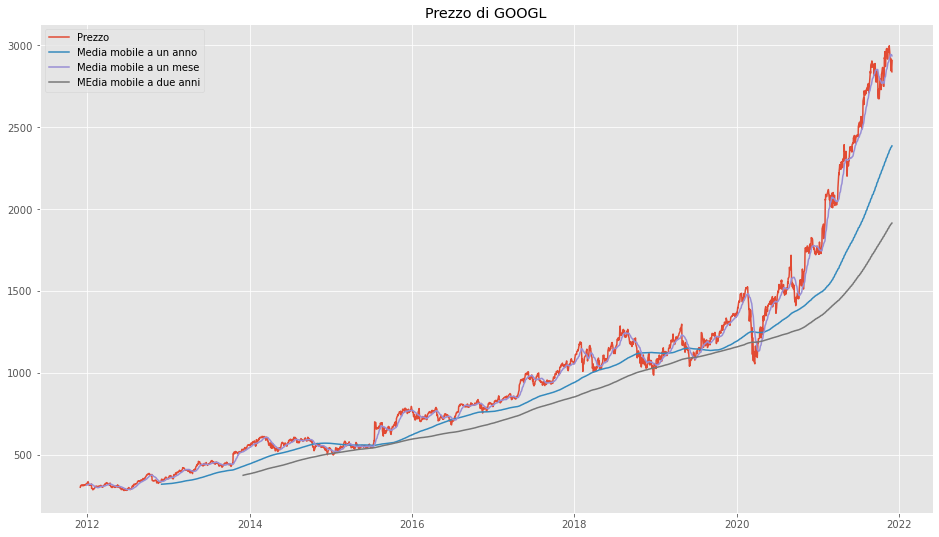

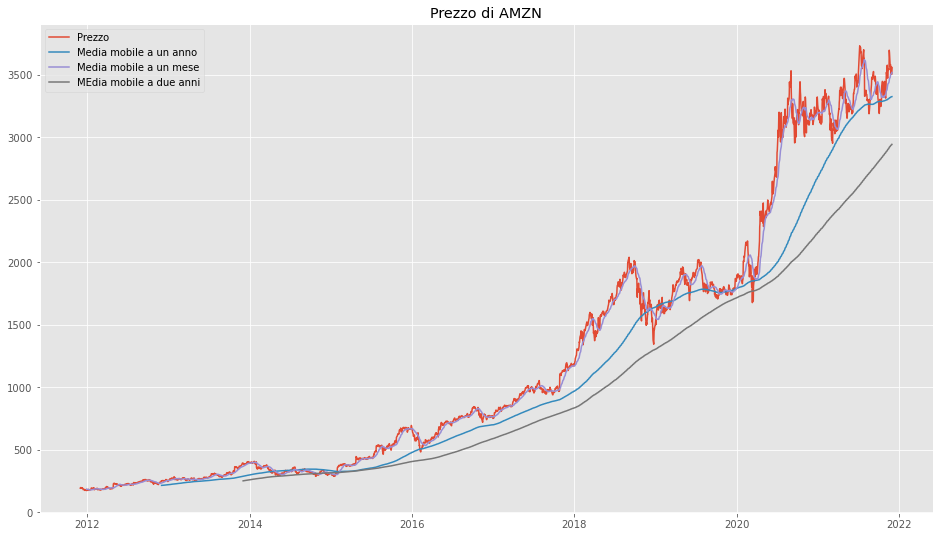

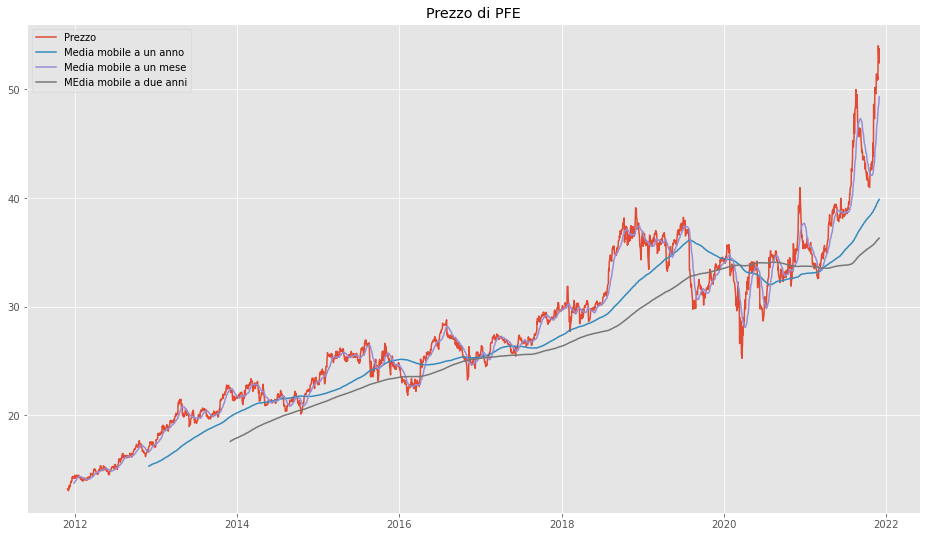

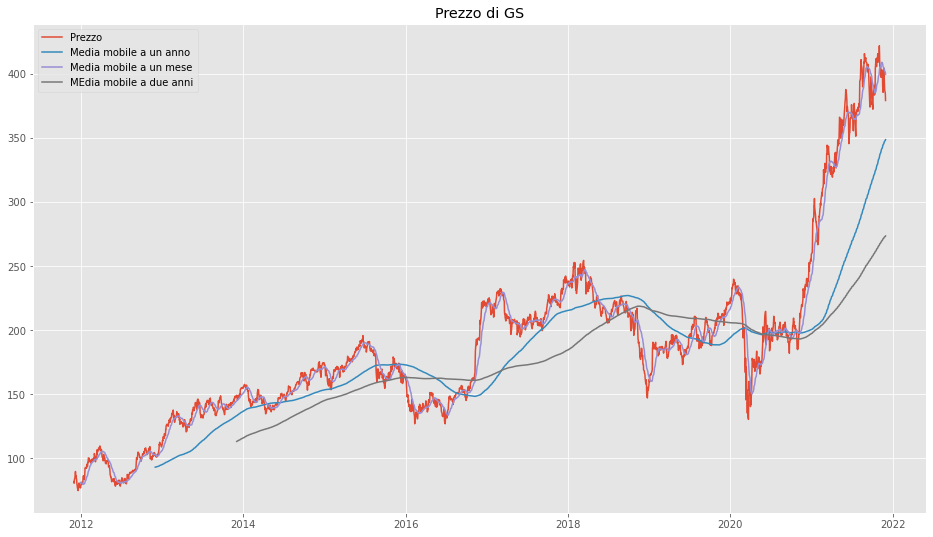

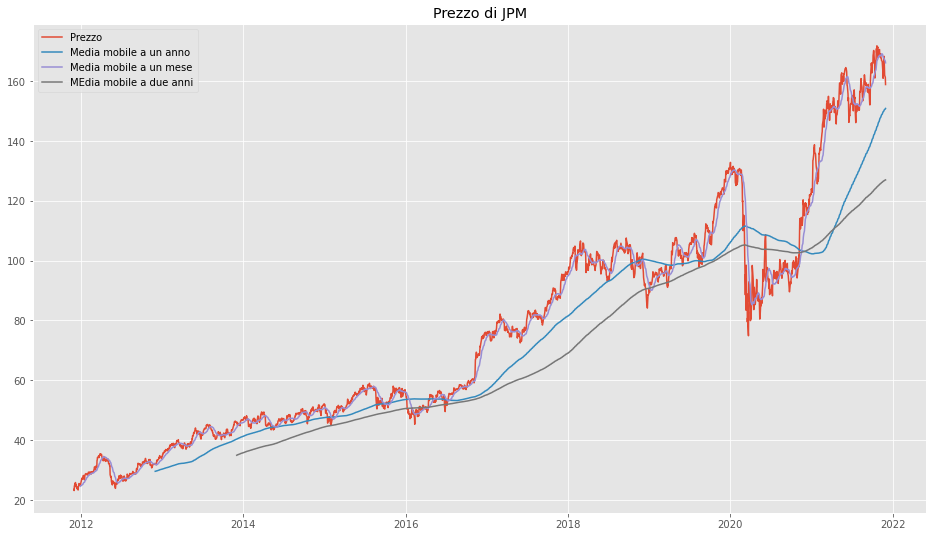

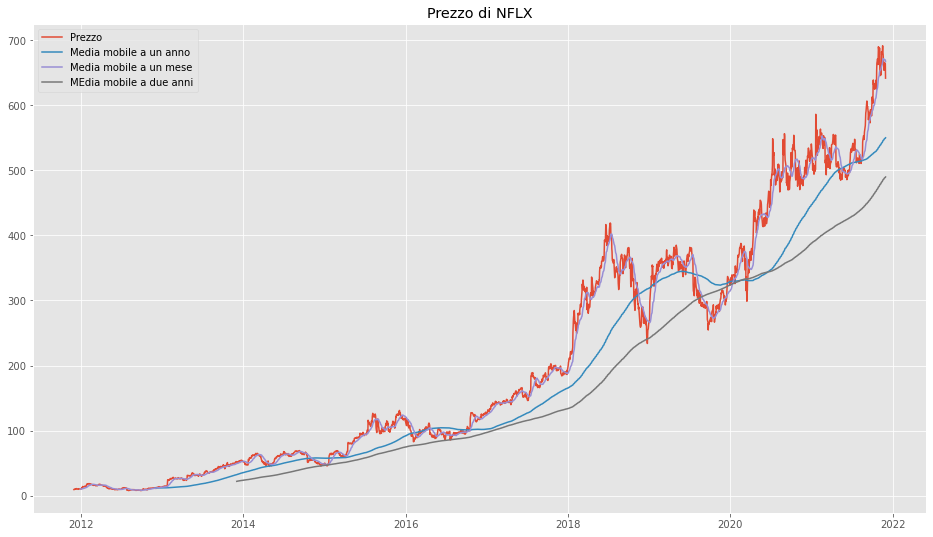

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
print(plt.style.available)
plt.style.use('ggplot')

start_date = '2011-11-30'
end_date = '2021-11-30'

tickers = ['GOOGL', 'AMZN', 'PFE', 'GS', 'JPM', 'NFLX']

datasets = {}
adj_close_df = {}
adj_close_dataset = {}


year_moving_average = 252
month_moving_average = 21
MA5 = 2 * year_moving_average

for ticker in tickers:
    datasets[ticker] = web.get_data_yahoo(ticker, start_date, end_date)
    adj_close_df[ticker] = datasets[ticker]['Adj Close']
    plt.figure(figsize=(16, 9))
    plt.title('Prezzo di ' + ticker)
    plt.grid(True)
    plt.plot(datasets[ticker]['Adj Close'], label = 'Prezzo')
    plt.plot(datasets[ticker]['Adj Close'].rolling(year_moving_average).mean(), label = 'Media mobile a un anno')
    plt.plot(datasets[ticker]['Adj Close'].rolling(month_moving_average).mean(), label = 'Media mobile a un mese')
    plt.plot(datasets[ticker]['Adj Close'].rolling(MA5).mean(), label = 'MEdia mobile a due anni')
    adj_close_dataset[ticker] = datasets[ticker]['Adj Close']
    plt.legend()
    print(ticker + ':\n', datasets[ticker].head(), '\n')

adj_close_df = pd.DataFrame(adj_close_df)

===STATISTICHE UNIVARIATE===

GOOGL:
Media: 0.0010187274815106322
Varianza: 0.0003
Deviazione Stamdard: 0.015865244541315767
Asimmetria: 0.5016007699161901
Curtosi: 11.218451681920437

AMZN:
Media: 0.0013353782070960783
Varianza: 0.0004
Deviazione Stamdard: 0.019073662204878467
Asimmetria: 0.5360097574189885
Curtosi: 8.05155889760218

PFE:
Media: 0.000639132631864744
Varianza: 0.0002
Deviazione Stamdard: 0.012818144016379977
Asimmetria: 0.34418318851290436
Curtosi: 7.719148502076896

GS:
Media: 0.0007651903669179625
Varianza: 0.0003
Deviazione Stamdard: 0.017642624830584822
Asimmetria: 0.1384994004582013
Curtosi: 10.28368773120283

JPM:
Media: 0.0009034738672175556
Varianza: 0.0003
Deviazione Stamdard: 0.016977513501348407
Asimmetria: 0.2804677570849142
Curtosi: 14.256936450241694

NFLX:
Media: 0.0021279906186320876
Varianza: 0.0009
Deviazione Stamdard: 0.030063628475125722
Asimmetria: 1.705927999292591
Curtosi: 24.518737441763413

             GOOGL         AMZN          PFE          

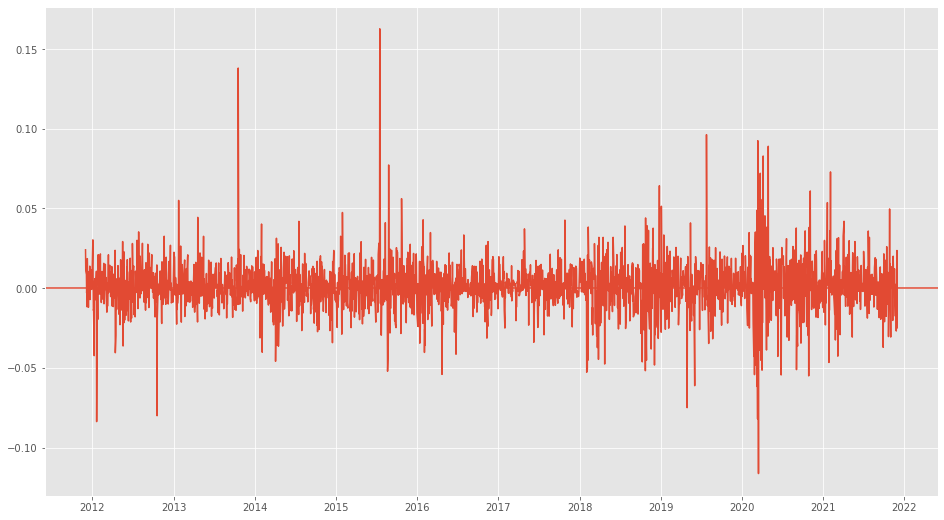

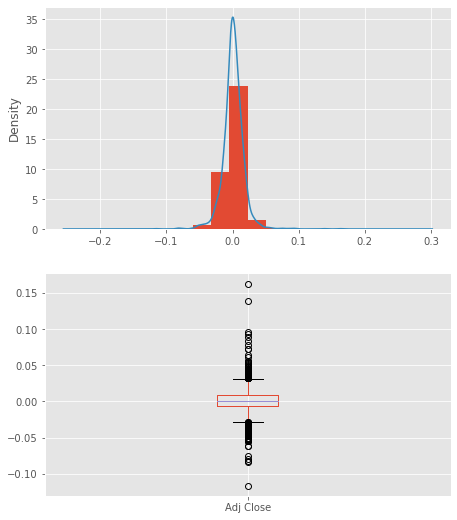

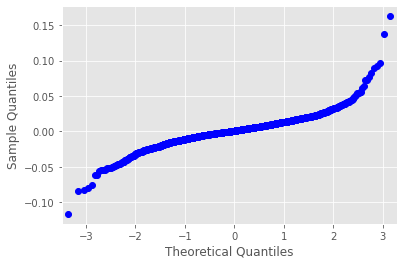

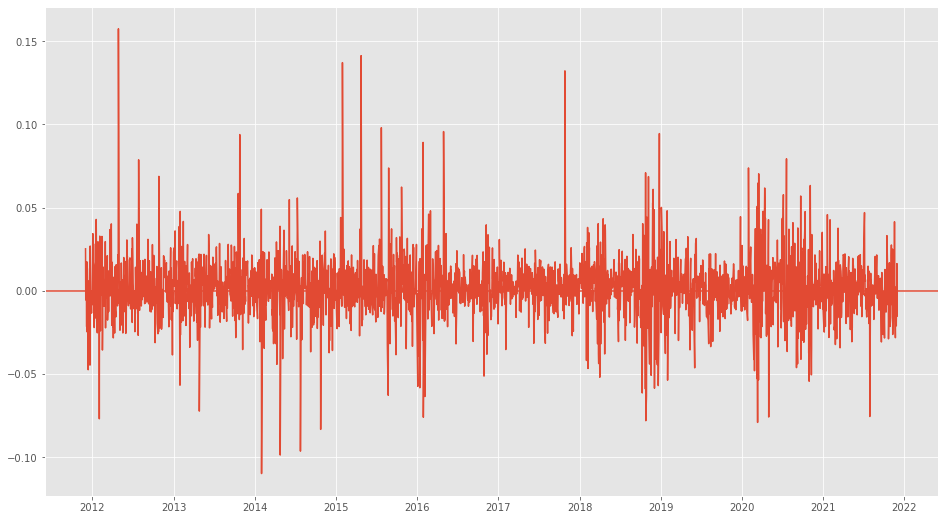

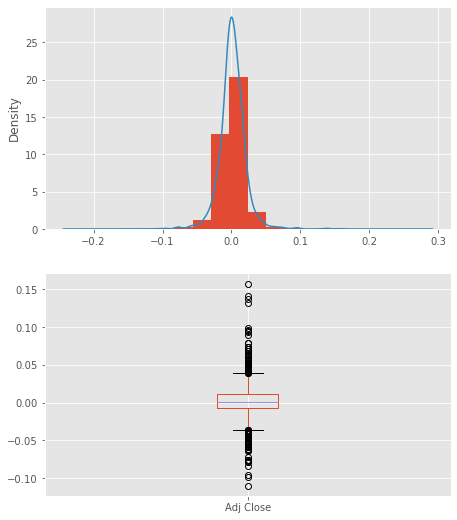

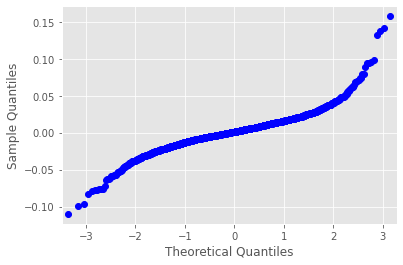

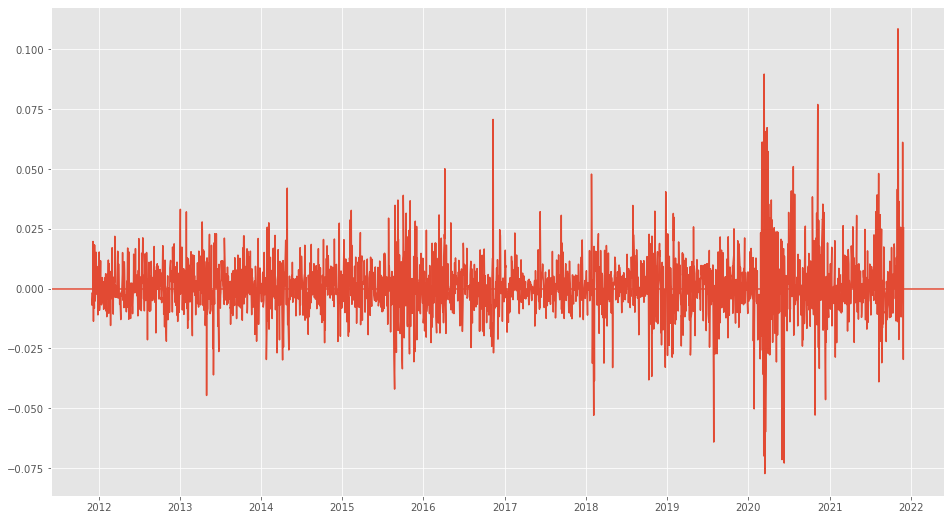

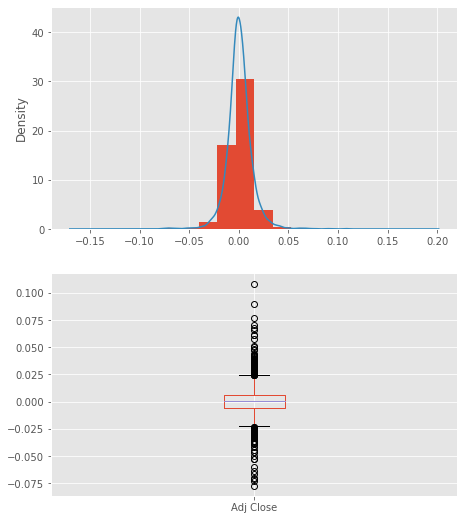

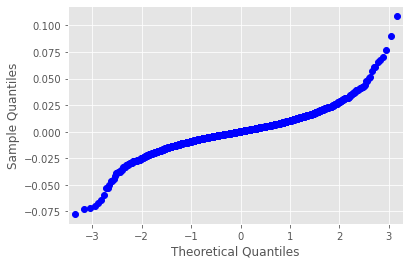

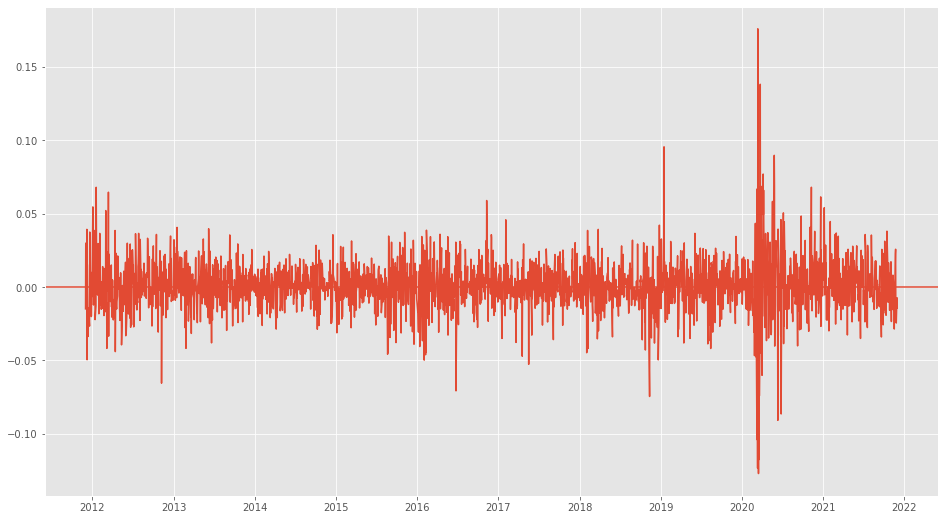

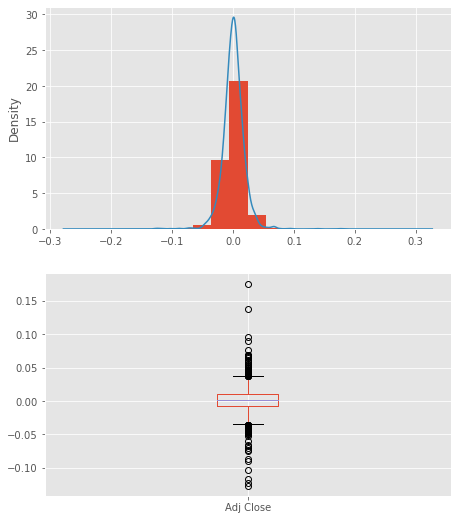

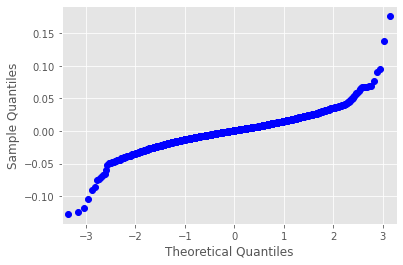

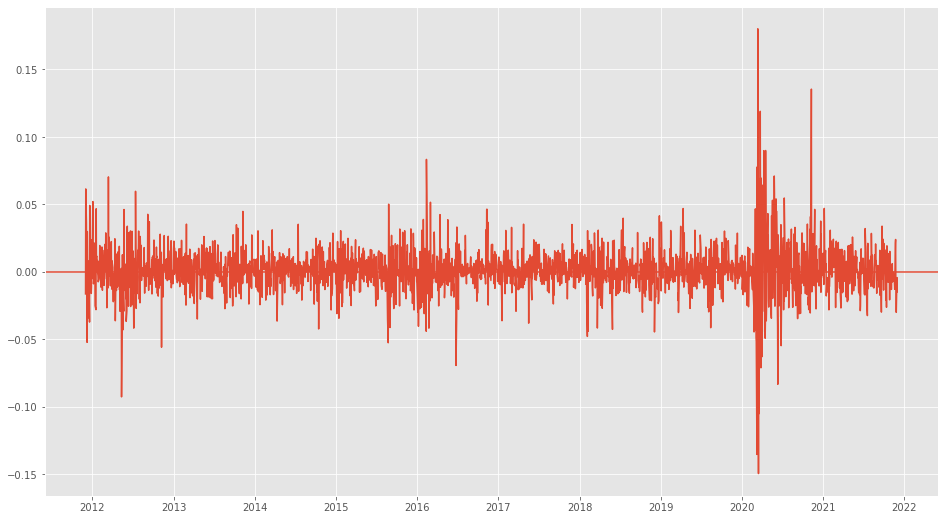

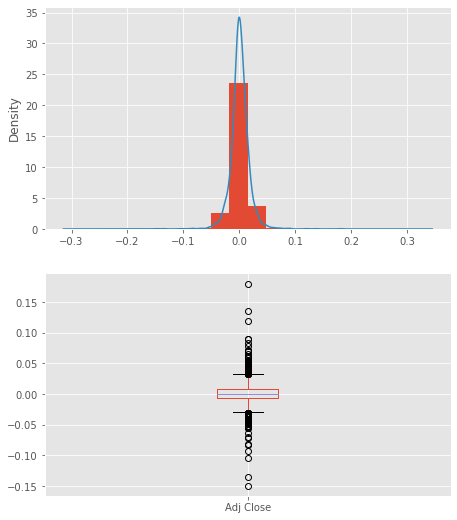

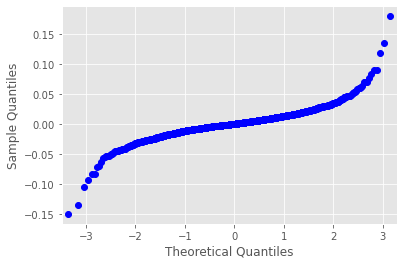

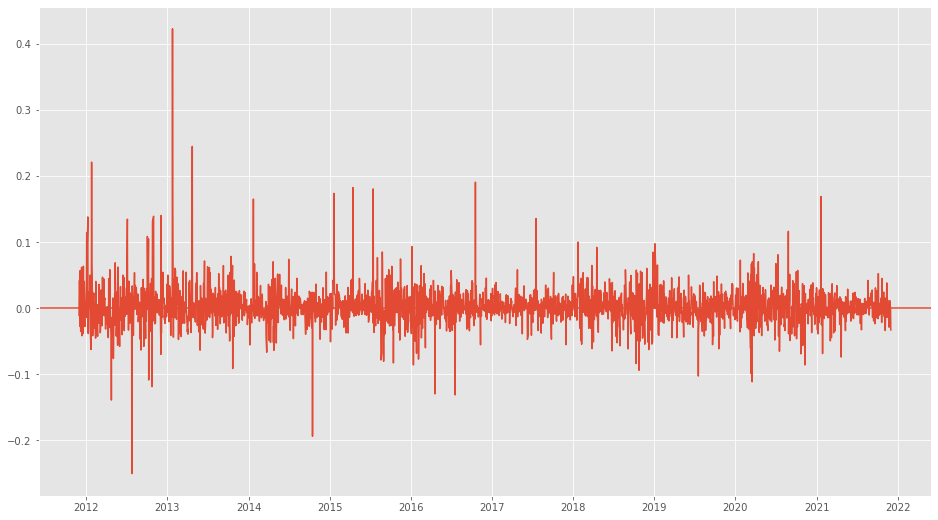

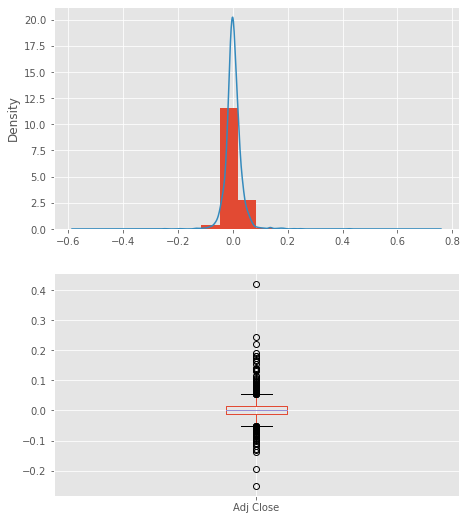

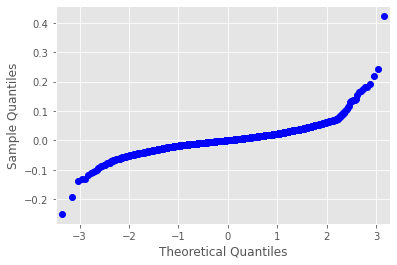

In [2]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

returns = {}
compounded_returns = {}

for ticker in tickers:
    returns[ticker] = datasets[ticker]['Adj Close'] / datasets[ticker]['Adj Close'].shift(1)
    compounded_returns[ticker] = returns[ticker].cumprod()
    plt.figure(figsize=(16, 9))
    returns[ticker] = returns[ticker] - 1
    plt.plot(returns[ticker])
    plt.axhline(0)
    #plt.plot(compounded_returns[ticker])
    plt.figure(figsize=(16, 9))
    plt.subplot(221)
    plt.hist(returns[ticker], density=True)
    returns[ticker].plot.density()
    plt.subplot(223)
    returns[ticker].to_frame().boxplot()
    sm.qqplot(returns[ticker])

returns = pd.DataFrame(returns)
print('===STATISTICHE UNIVARIATE===\n')
for ticker in tickers:
    print(ticker + ':')
    print('Media: ' + str(returns[ticker].mean()))
    std = returns[ticker].std()
    var = returns[ticker].var()
    print('Varianza: ' + str(np.round(std ** 2, 4)))
    print('Deviazione Stamdard: ' + str(std))
    print('Asimmetria: ' + str(returns[ticker].skew()))
    print('Curtosi: ' + str(returns[ticker].kurtosis()) + '\n')


print(returns.describe())
print(np.round(returns.cov(), 4))
print(np.round(returns.corr(), 4))

## Previsione con rete neurale

Epoch 1/20
15/15 [==============================] - 1s 10ms/step - loss: 114046.6016 - mape: 35.9312
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 23232.7207 - mape: 15.7657
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 10772.0107 - mape: 12.4123
Epoch 4/20
15/15 [==============================] - 0s 15ms/step - loss: 8850.6963 - mape: 10.9846
Epoch 5/20
15/15 [==============================] - 0s 12ms/step - loss: 8482.8936 - mape: 10.9673
Epoch 6/20
15/15 [==============================] - 0s 12ms/step - loss: 8447.1807 - mape: 10.9120
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 8431.9199 - mape: 10.8969
Epoch 8/20
15/15 [==============================] - 0s 10ms/step - loss: 8439.2988 - mape: 10.8974
Epoch 9/20
15/15 [==============================] - 0s 9ms/step - loss: 8433.9854 - mape: 10.9109
Epoch 10/20
15/15 [==============================] - 0s 10ms/step - loss: 8428.2734 - mape: 10.8945
Epoch 

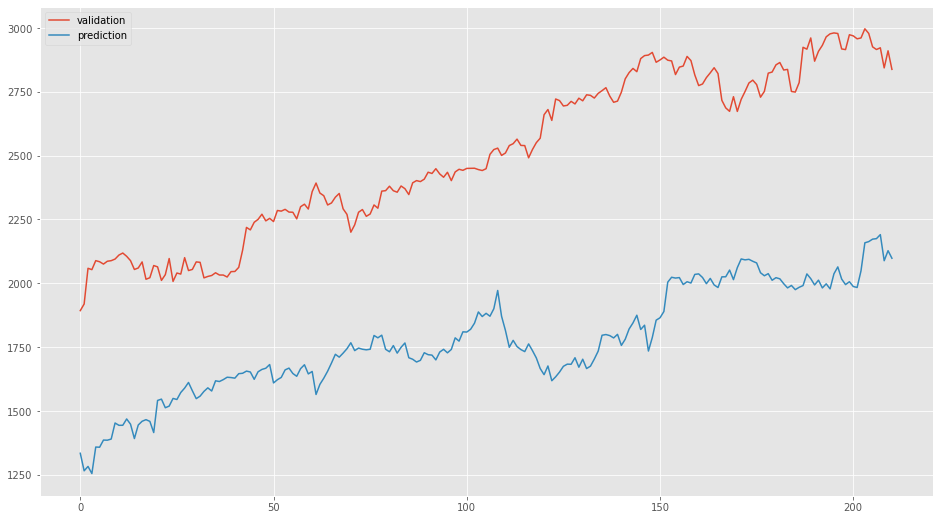

In [59]:
from tensorflow import keras
import tensorflow as tf
import datetime
from dateutil.relativedelta import  relativedelta



#divido i dati in 80 mesi di training, 30 di test, 10 validazione. faccio le proporzioni


for ticker in ['GOOGL']:

    data = datasets[ticker]['Adj Close']


    train = data.loc[start_date : '2018-07-30']
    test = data.loc['2018-07-31':'2021-01-30']
    validation = data.loc['2021-01-31':'2021-11-30']


    window_size = validation.shape[0]
    output_size = validation.shape[0]



    model = keras.Sequential([
        tf.keras.layers.Conv1D(filters=32,
                              kernel_size=(1,),
                              activation='relu'),

        tf.keras.layers.Dense(32),
        keras.layers.Dense(32),
        tf.keras.layers.Dense(units=1),
    ])


    #model.compile(loss = 'mse', metrics = ['mae'])
    model.compile(
        optimizer = 'adam',
        loss='mse',
        metrics=['mape'],
    )


    train_inputs = np.asarray([data[i:i+window_size] for i in range(0, train.shape[0] - window_size)]).reshape((train.shape[0] - window_size, window_size, 1))
    train_outputs = np.asarray([data[i + window_size:i + window_size + output_size] for i in range(0, train_inputs.shape[0])]).reshape((train_inputs.shape[0], output_size, 1))


    test_inputs = np.asarray([data[i:i+window_size] for i in range(train.shape[0], train.shape[0] + test.shape[0] - window_size)]).reshape((test.shape[0] - window_size, window_size, 1))
    test_outputs = np.asarray([data[i + window_size : i + window_size + output_size] for i in range(train.shape[0], train.shape[0] + test_inputs.shape[0])]).reshape((test_inputs.shape[0], output_size, 1))


    model.fit(train_inputs, train_outputs, epochs = 20, batch_size=100,
              #validation_data = (test_inputs, test_outputs)
              )


    #pred_input = np.asarray([data[i : i + window_size] for i in range(data.shape[0] - validation.shape[0] - window_size, data.shape[0] - window_size)])
    #print(pred_input)
    #Costruisco la nuova predizione in modo iterativo
    #predictions = []
    #input_data = np.asarray([data[data.shape[0] - validation.shape[0] - window_size : data.shape[0] - validation.shape[0]]])
    #print('input data:', input_data)

    """
    for i in range(0, validation.shape[0]):
        predicted = np.asarray(model.predict(input_data))
        print('out:', predicted.shape)
        predictions.append(float(predicted[0][0]))
        input_data[0] = np.roll(input_data[0], -1)
        input_data[0][window_size - 1] = predicted[0][0]
    """
    performance = model.evaluate(test_inputs, test_outputs)
    print(performance)

    predictions = np.asarray(model.predict(np.asarray(data[data.shape[0] - validation.shape[0] - window_size : data.shape[0] - validation.shape[0]]).reshape(1, output_size, 1)))


    plt.figure(figsize=(16, 9))
    plt.plot(np.asarray(validation), label = 'validation')
    plt.plot(np.asarray(predictions[0]), label = 'prediction')
    plt.legend()

In [60]:
from pmdarima import auto_arima

arima_model = auto_arima(np.concatenate([np.asarray(train).reshape(len(train)), np.asarray(test).reshape(len(test))]), start_p = 0, start_q = 0, max_p = 10, max_q = 10, max_d = 10, start_P=0, start_Q=0, start_D = 1, n_fits=1000)
arima_model

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

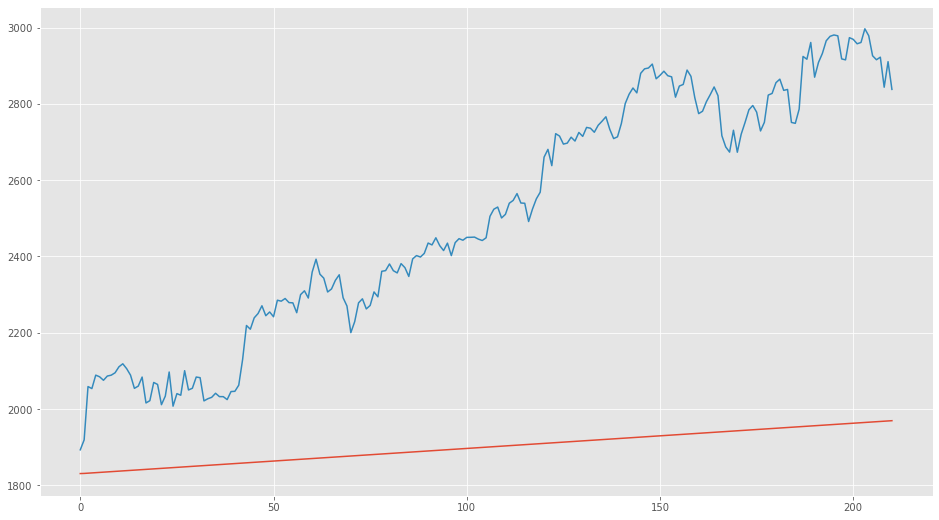

In [61]:
plt.figure(figsize=(16, 9))
plt.plot(arima_model.predict(n_periods=validation.shape[0]))
plt.plot(np.asarray(validation))

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web

future_days = validation.shape[0]

X = np.array(data)
X = X[:data.shape[0] - future_days]
y = np.array(datasets[tickers[0]].shift(-future_days))
y = y[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gamma = 0.000001

svr_rbf_confidence = 0
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=gamma)
svr_rbf.fit(x_train, y_train)
x_f = svr_rbf.predict(datasets[tickers[0]]['Adj Close'].iloc[datasets[tickers[0]]['Adj Close'].shape[0] - future_days : datasets[tickers[0]]['Adj Close'].shape[0]])
svm_prediction = np.append(datasets[tickers[0]]['Adj Close'].iloc[datasets[tickers[0]]['Adj Close'].shape[0] - x_test.shape[0]: data.shape[0]], x_f)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

minimo = svm_prediction.min()
massimo = svm_prediction.max()

print(svr_rbf_confidence)

full_pred = svm_prediction
